<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Decision_trees_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[: , :2]
y = iris.target

In [18]:
print(X.shape , y.shape)

(150, 2) (150,)


In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth = 5,min_samples_split=30)
tree1.fit(X_train , y_train)
y_pred = tree1.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy score : ",accuracy_score(y_test , y_pred ))

accuracy score :  0.8333333333333334


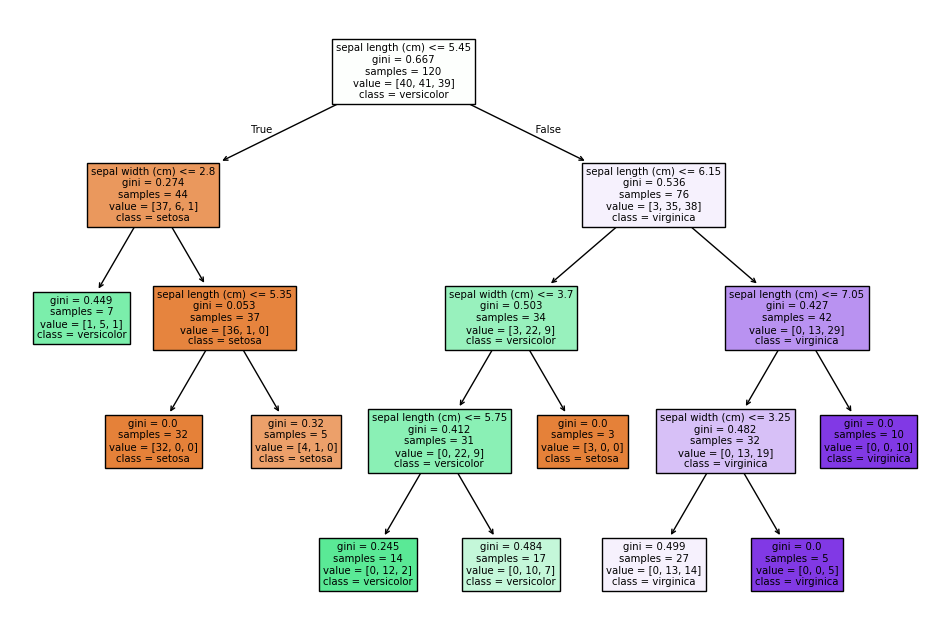

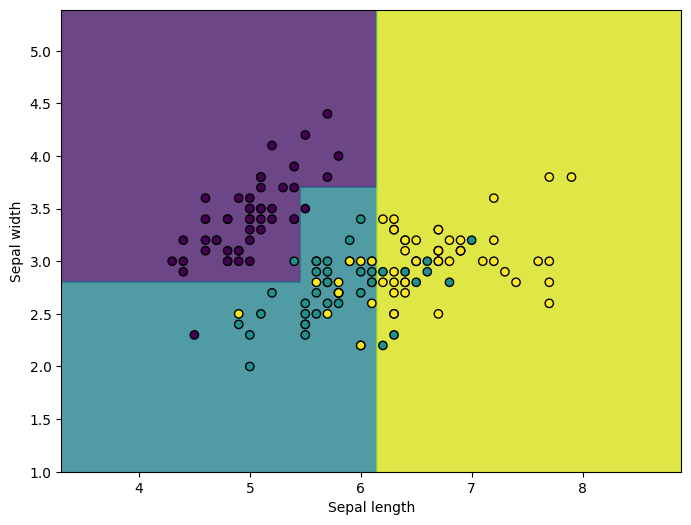

In [34]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree1,filled=True , feature_names = iris.feature_names[:2] , class_names=iris.target_names)
plt.show()

# plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = tree1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
